# Build Single Layer Perceptron

### Lets start to tie all this knowledge together and build our first model. We will start with a single layer perceptron. This one of the simplest models you can build as it only has 2 layers- 1 input, and 1 output layer. It looks like this:

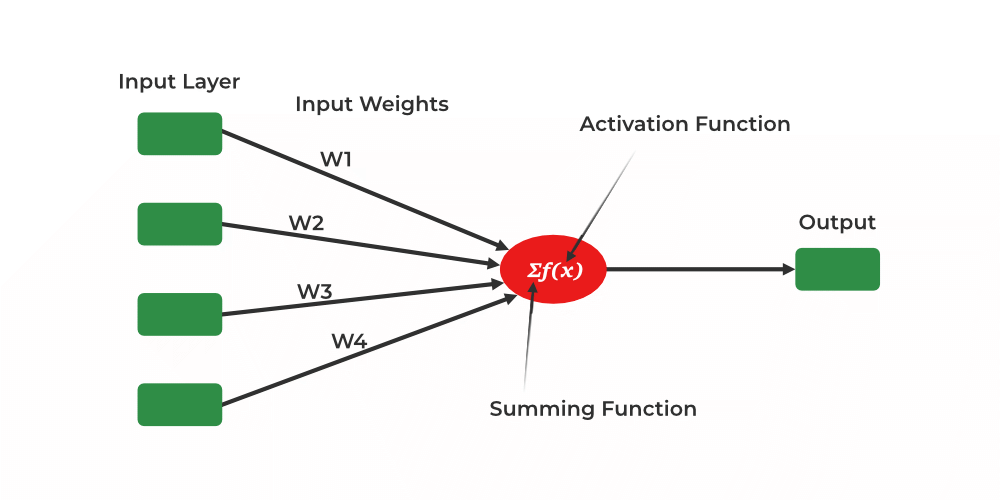

### If you are saying to yourself, 'that doesn't that exciting', you are kind of right. All that is happening in this model is that the model gets some inputs (in the form of a tensor), multiplies them by some weights, sums this up, applies an activation function, and then sends the output. 

### Even if it not the most theoretically interesting model, all the concepts we learned about are still relevant and on full display. The loss function will compare the predicted outputs to the input and to get the gradients for each weight via backpropagation, and the optimizer will then update those weights. Don't forget this guy:

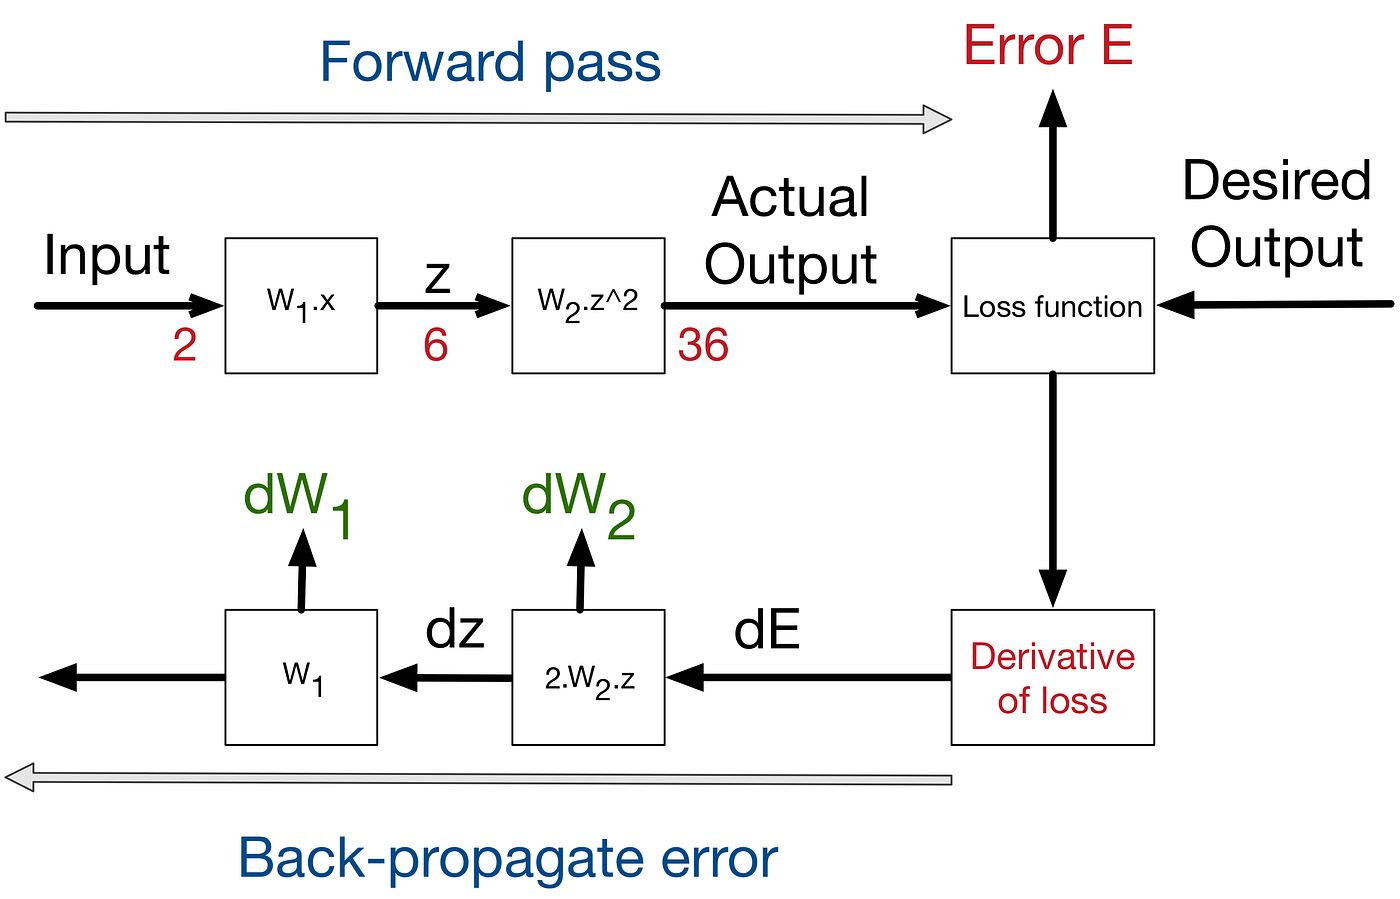

### In the next module we will implement a true neural network. Once you  make it through this notebook, you will see the end to end picture of how to build a model from scratch, implement loss, and optimization functions, train, test, and analyze your results. 

### As you go forward in your AI journey, most of your code will be structured in this way. Of course it can get as complicated as you like the deeper you go, but this is truly the framework for it all. **Lets dive in!**


In [61]:
# Importing the Libraries

import torch
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt



### In the real world, a large of portion of your time doing AI is spent finding and formatting your data. Because we want to focus on the AI side of things we won't spend too much time here with data prep (although it is *really* important)

### Scikit learn conveniently provides some built in datasets that are great for practice. One of them is called the wisconsin breast cancer dataset. This dataset is a collection of features computed from fine needle aspirates of breast masses such as:

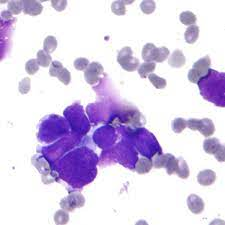

#### Keep in mind though that this dataset consists of features calculated from these images, not the images themselves

## **Lets first load the dataset and take a look at it**

In [62]:
# Loading the Dataset
# We're using the wisconsin breast cancer dataset
# Our goal is to predict if the tumor is malignant or benign

# Load  dataset
breast_dataset = datasets.load_breast_cancer()

print(breast_dataset.feature_names)
print('number of features=',len(breast_dataset.feature_names))



['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
number of features= 30


### We can see that there are 30 features, consisting of 10 characteristics computed for each nucleus. For each characteristic, the mean, standard error, and worst value are calculated (3 measurements were done for each FNA). 

### Also included in the dataset are ID numbers for all the FNAs (569 total) and whether or not the data is benign (1) or malignant (0)

#### See docummentation of the dataset for more details-https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

### Lets take a look at the distribution of benign and malignant data sets as well as verify the legnth of the data



In [63]:
# Import necessary libraries
# collections is a Python module implements specialized container datatypes 
# providing alternatives to Python’s general purpose built-in containers.
from collections import Counter 

# Load the target values from the breast cancer dataset
# These are the labels we want to predict: 0 for malignant and 1 for benign
# the data we imported earlier from sci kit learn is stored in a dictionary with the 
# diagnosis having the key 'target'. As such we can access the data using this line of code
target = breast_dataset['target']

# Count the occurrence of each class in the target data
# Counter creates a dictionary where keys are the unique elements in the list, and the values are their counts.
# This helps us understand the distribution of classes in our dataset
class_distribution = Counter(target)

# Print out the counts of each class
# This gives us a quick look at how many samples belong to each class.
print(f"Malignant: {class_distribution[0]}")
print(f"Benign: {class_distribution[1]}")

# Print the length (or size) of the dataset
# This tells us the total number of samples in our dataset
print(f"Total number of samples in the dataset: {len(target)}")


Malignant: 212
Benign: 357
Total number of samples in the dataset: 569


### Ok now we are getting into the good stuff. Because we are only trying to predict if the FNA is beingn or malignant, this counts as a binary classification problem. Lets take another look at some of the characteristics of the breast_dataset we imported to get an intuition as to how we want to break up the data

In [64]:
print(breast_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [65]:
print(breast_dataset['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [66]:
print(breast_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

### Lets really break this down. The dataset was imported as a dictionary using scikit learn. It has a data and target components. The target is the 0 or 1 that determines malignant or benign. The data is the 30 metrics we discussed earlier for each aspirate. As such, we want to make our inputs to the model the data component of the dictionary, and predict an output which is the target component.

### We can do this by storing the data and targets in variables, converting the dataset into tensors (as that is the data type of AI), and then finally split into train and test sets using the built in method introduced in module 3. Lets give this a go

In [67]:
# The 'data' attribute of the dataset contains the feature matrix, which we will use as inputs for our model. 
# We store this in the 'inputs' variable.
inputs = breast_dataset['data']

# The 'target' attribute of the dataset contains the labels, i.e., the correct answers we aim to predict (benin or malignant).
# These are our target outputs, which we store in the 'target_outputs' variable.
target_outputs = breast_dataset['target']

# To work with PyTorch, we need to convert our data from NumPy arrays to PyTorch tensors.
# PyTorch tensors are multidimensional matrices, similar to NumPy's ndarrays, but they can be used on GPUs.
# We also specify 'dtype=torch.float' to ensure the data type is float as the data contains decimals
input_tensors = torch.tensor(inputs, dtype=torch.float)

# We perform the same conversion for our target outputs. However, we also reshape the tensor to be two-dimensional, 
# where the second dimension (i.e., the number of columns) is 1. 
# This is done using the 'view' function.
# '-1' in the view function is used when you aren't sure about the dimension and you want PyTorch to calculate it for you.
# In essence, this makes the tensor of shape 569x1 because there are 569 data points 
target_output_tensors = torch.tensor(target_outputs, dtype=torch.float).view(-1, 1)

# Splitting the Dataset
#We split the dataset into training and test sets. This will help us to evaluate our model's performance later.
# This is the same line used in module 3 for the data science section
data_train, data_test, target_train, target_test = train_test_split(input_tensors, target_output_tensors, test_size=0.2, random_state=42)



## **Now, lets build our model. Remember we are building what is called a single-layer perceptron, which is one of the simplest types of artificial neural networks. It's essentially a linear classifier, similar to logistic regression.**

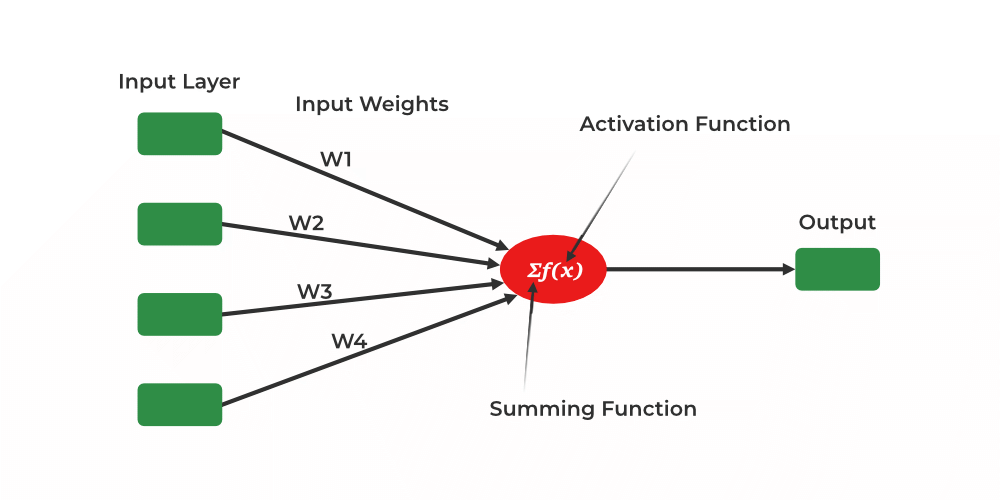

### We're using the torch.nn.Sequential function to define our model. This function from PyTorch allows us to build a model as a sequence of layers. The data is passed through each layer in the order they are defined in the model variable. Here is a schematic of how this code breaks out graphically (this is a different model than we are using, however. Dont let this confuse you)

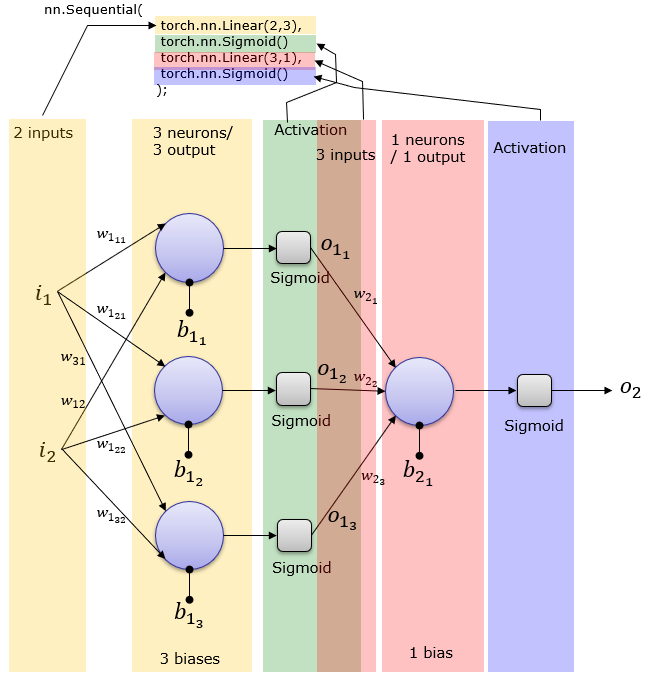

### Our model consists of two parts:
  
### ```torch.nn.Linear(30, 1)```: This is our single layer of the single layer perceptron. This performs a linear transformation on the data. It takes the number of input features (which is equal to the number of columns in our data, 30 in our case) and maps them to a single output feature. The output feature will be a single number, representing the likelihood that a given input belongs to the positive class (benign or malignant). Linear transformation is a term from linear algebra, and at a high level, it is a transformation of data that maintains the operations of addition and scalar multiplication. In the case of our neural network, it's transforming the input features (30 measurements) into a single output value by finding the optimal weights and biases. These weights determine the importance of each feature in our prediction, and the bias is a constant added to the product of inputs and weights, allowing the function to fit the data better. For a great review of this topic, 3 Blue 1 Brown has a great video (https://www.youtube.com/watch?v=kYB8IZa5AuE) 

### ```torch.nn.Sigmoid()```: This is our activation function, which squashes the output of the linear layer to a value between 0 and 1. This is useful for binary classification problems like ours, because it allows us to interpret the model's output as a probability. If the output is greater than 0.5, we can classify the input as belonging to the positive class; otherwise, we can classify it as belonging to the negative class. 

- ##### Dont be confused by how we are using a sigmoid activation function. We covered ReLU in the last notebook which is very common, but for binary classification tasks sigmoid activation functions are the correct choice mathematically as it outputs a probability which sums to 1. Dont worry about going into a deep dive on this! When choosing activation functions in your model you should look at what other people have done, read, and never be afraid to trial and error.

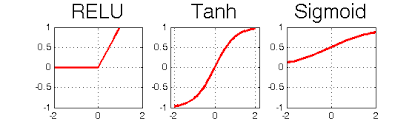

In [69]:
model = torch.nn.Sequential(
    torch.nn.Linear(30, 1), # torch.nn.Linear is a linear transformation (y = xA^T + b) 
                                              # with parameters (weights and biases).
                                              # This layer takes two arguments: the number of input features (30) 
                                              # and the number of output features (1, the prediction).
          

    torch.nn.Sigmoid() # We use the Sigmoid activation function, which squashes its input to a value between 0 and 1.
                       # This is appropriate for binary classification, as it allows us to interpret the output as a probability.
)


### You might be asking yourself a really important question right about now which is, why did we not have to tell the computer ```requires_grad=True``` anywhere? Neither of our input or output tensors have this defined, but if we want to train this model won't we need to update the weights and biases?

### The reason we didnt do ```requires_grad=True``` when converted our arrays to tensors earlier is because those tensors are just storage containers for our data and labels. All of the weights are automatically contained within the model when we initialize it with ```torch.nn.sequential``` by default. Less work for us, but a point that needs explaining nonetheless

## **Now lets define the loss function and optimizer**

### We introduced you to how to implement cross entropy loss in the last notebook, but because this is a binary classification problem (1 or 0), we will use the binary cross entropy loss. You should feel free to experiment with different loss functions as sometimes it can take some tweaking to find the right ones

### We will also be using Stochastic Gradient Descent as the optimizer. This is a good general purpose optimizer, but others exist as well! Check the PyTorch documentary or refer back to the glossary to see some other options 

In [70]:
# Defining the Loss Function and Optimizer
# We're using Binary Cross Entropy loss for our model and Stochastic Gradient Descent as our optimization algorithm.

# Loss and optimizer
loss_fn = torch.nn.BCELoss()                  # Binary Cross Entropy loss
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  # Setting a very low learning rate due to simplicity of model- want to take small steps down the 
                                                            # hill at the cost of potentially training longer


## **The moment we've all been waiting for. Time to really train the model!**

### First, lets break down the structure of how this works. We train models *iteratively* meaning we want to do multiple iterations of updating our weights based on the training data. Every time we send the data to the model to update the weights it is called an *epoch*. Your model will continue to get better with more epochs until it converges and stops improving significantly. 

### So for every epoch, we send the training data to the model to make predictions (```y_pred = model(data_train)```), we compute the difference between the predictions and the real values using our loss function (```loss = loss_fn(y_pred, target_train)```) and find the gradient of the loss using backpropagation (```loss.backward```), and then we update the weights using the optimizer (```optimizer.step```). Before the next epoch we want to 0 out the gradients again so we can accurately update the weights after the newly updated model has made fresh predictions

### We must touch upon one of ***the most important*** things for you to understand about AI/ML now, and that is the concept of overfitting. When the model sees the training data too many times it will only learn features and characteristics present in the training set. This will result in your model performing poorly on the test set, and more importantly will not allow your data to generalize to new data, which is the worst. You must always keep an eye out for overfitting and prevent it like the antibiotic overuse. The main tell of overfitting is when your models error increases over time on the test set and decreases on the train set. It is unlikely to happen in this very simple example, but it *will* happen if you are not careful as your problems get more complex

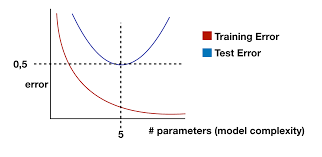

### See module 3 for a more nuanced discussion of bias and variance as these topics are similar and related. Because it is ***SO IMPORTANT*** we have provided a brief overview here as well AGAIN. Hardwire this into your own neural network!

- #### Bias refers to the simplifying assumptions made by a model to make the target function easier to learn. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting). It implies that the model is too simple and does not capture the complexity of the data well enough. 

- #### Variance refers to the amount that the estimate of the target function will change if different training data was used. High variance can cause an algorithm to model the random noise in the training data (overfitting). It means the model is too complex and is sensitive to the high degree of variations in the data. Imagine a model that tries to fit every single data point in the training set perfectly (a complex model with high variance) and fails to generalize to new data because it is too tailored to the training data.

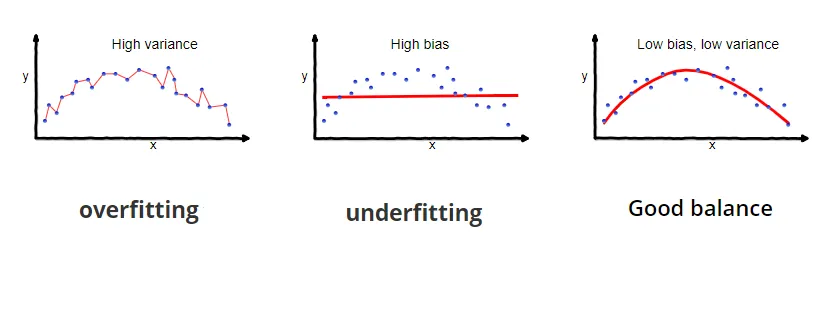

In [71]:
# Training the Model
# Finally, we train our model. We iterate over our data, compute the predicted outputs, calculate the loss, and update our model's parameters.
epochs = 30000 # define number of epichs to train for
losses = [] # define a list to keep track of the losses for future iterations
# Training loop
for epoch in range(epochs): # Train for number of epochs specified
    # Forward pass
    y_pred = model(data_train)     # Make predictions

    # Compute loss
    loss = loss_fn(y_pred, target_train)   # Calculate loss
    losses.append(loss.item()) # append the loss to our losses list for future graphing
    # Backward pass and optimization
    loss.backward()             # Compute gradients
    optimizer.step()            # Update model parameters

    # Zero out gradients for the next step
    optimizer.zero_grad()       # Clear gradients for next epoch

    # Print loss for every 20th epoch. This is strictly for monitoring the progress of the training procedure
    if epoch % 20 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 36.95305633544922
Epoch 20, Loss: 35.16962432861328
Epoch 40, Loss: 21.28940773010254
Epoch 60, Loss: 6.132884979248047
Epoch 80, Loss: 34.61279296875
Epoch 100, Loss: 36.547637939453125
Epoch 120, Loss: 3.3348724842071533
Epoch 140, Loss: 7.284959316253662
Epoch 160, Loss: 36.1710319519043
Epoch 180, Loss: 36.17319869995117
Epoch 200, Loss: 35.591209411621094
Epoch 220, Loss: 6.372506141662598
Epoch 240, Loss: 36.174217224121094
Epoch 260, Loss: 10.381990432739258
Epoch 280, Loss: 32.5338134765625
Epoch 300, Loss: 6.300387859344482
Epoch 320, Loss: 6.3526763916015625
Epoch 340, Loss: 14.842320442199707
Epoch 360, Loss: 6.040207386016846
Epoch 380, Loss: 0.5501412749290466
Epoch 400, Loss: 0.4563184082508087
Epoch 420, Loss: 0.4526427984237671
Epoch 440, Loss: 0.4492739140987396
Epoch 460, Loss: 0.44593456387519836
Epoch 480, Loss: 0.44261226058006287
Epoch 500, Loss: 0.43929946422576904
Epoch 520, Loss: 0.43601194024086
Epoch 540, Loss: 0.43273448944091797
Epoch 560, Lo

Epoch 2020, Loss: 0.3488622307777405
Epoch 2040, Loss: 0.3450787365436554
Epoch 2060, Loss: 0.341387003660202
Epoch 2080, Loss: 0.33778324723243713
Epoch 2100, Loss: 0.3342682123184204
Epoch 2120, Loss: 0.33083969354629517
Epoch 2140, Loss: 0.3275032937526703
Epoch 2160, Loss: 0.32865801453590393
Epoch 2180, Loss: 18.06143569946289
Epoch 2200, Loss: 14.987566947937012
Epoch 2220, Loss: 3.661810874938965
Epoch 2240, Loss: 1.137197732925415
Epoch 2260, Loss: 1.6282507181167603
Epoch 2280, Loss: 1.5791478157043457
Epoch 2300, Loss: 0.38276103138923645
Epoch 2320, Loss: 0.36530858278274536
Epoch 2340, Loss: 0.36089658737182617
Epoch 2360, Loss: 0.35658299922943115
Epoch 2380, Loss: 0.3523721694946289
Epoch 2400, Loss: 0.34826400876045227
Epoch 2420, Loss: 0.34425806999206543
Epoch 2440, Loss: 0.3403543531894684
Epoch 2460, Loss: 0.3365533947944641
Epoch 2480, Loss: 0.33285391330718994
Epoch 2500, Loss: 0.32925647497177124
Epoch 2520, Loss: 0.32575884461402893
Epoch 2540, Loss: 0.3223614394

### Lets plot our loss over time to see what happened 

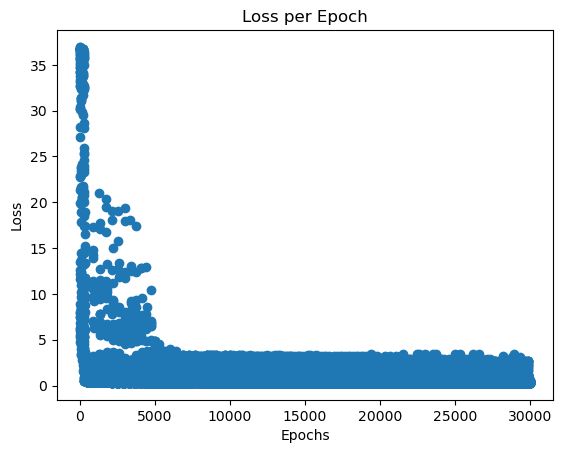

In [75]:
# Create a new figure
plt.figure()

epochs_plot = [i for i in range(epochs)]
# Plot the losses
plt.scatter(epochs_plot, losses)

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch')

# Display the plot
plt.show()

### Ok Not bad! Our loss goes down which is always a good thing and it looks like our model converges! Lets check it out.


## **Testing the Model**

### Now lets test our model. There are a few PyTorch code details in this next cell which you just kind of have to know (or google when you need it), but the essence of this is that we want to divde how many predictions are model got correct by the total number of samples. Then we will print the results to see!

##### Note, there are so many other ways to validate your model, so dont think this is the gold standard by any means. This is the ole 'quick and dirty' approach

In [76]:
# No gradient computation needed in evaluation phase
with torch.no_grad(): # This line sets the context for computation without tracking gradients. 
                      # We specify no gradient here because during model evaluation we don't want to update the model's parameters.
                      # We want to strictly assess how our trained model is doing

    y_pred = model(data_test) # This line feeds the test data to the model and computes the output (predictions). 
                              # Here, the model is not being trained, it's just making predictions on the test data.

    y_pred_round = y_pred.round() # The model's output is a probability value between 0 and 1. 
                                # We round off this value to get the predicted class (0 or 1).
                                # This means that if the output from the model is .5 or greater, it thought the data represented
                                # a benign fine needle aspiration, If < .5, it thought it was malignant. Remember how sigmoid activation 
                                # function gave a value between 0 and 1? This is when that becomes relevant!
    
    # Check how many predictions the model got right on the test set.
    correct_predictions = y_pred_round.eq(target_test).sum() # the .eq is a pyTorch move to compare how many elements in two (equal size) tensors 
                                                           # are the same. We want to see how many of our predicted values are the same as in our
                                                           # ground truth test set so we can calculate a percentage later

    total_test_cases = float(target_test.shape[0])  # Get the total number of test cases. by taking the shape of the test tensor


    # Calculate the accuracy by dividing the number of correct predictions by the total number of test cases.
    accuracy_fraction = correct_predictions / total_test_cases

    accuracy = accuracy_fraction.item()  # Convert the tensor to a standard Python number using .item




print(f'Accuracy: {accuracy*100:.2f}%') # This line prints the accuracy of the model as a percentage, formatted to 2 decimal places.


Accuracy: 91.23%


### Sweet! 91.23% Is not bad for your first model

### A couple caveats here... This is a *very* simple model. In fact, it is the most simple model, one can create. This almost definitely introducing bias (even though we were still able to make good predictions), and in a real world situation this wouldn't be good. You want to build a model that suits your data, and there are very few if any situations where a SLP is a good fit

### If you want to see how finicky this stuff can be, try playing around with the learning rate and number of epochs. You will quickly see that the loss can increase with more training with too large of an LR, and that with not enough epochs and a low LR it does not converge. This 'playing' with hyperparameters is truly an essential part of doing AI work, but you should be weary of how your decisions can affect your results

### Another thing to note is that most modern laptops will be able to train 30,000, 50,000, even hundreds of thousands of epochs when the model is this basic. This will *extremely quickly* not become the case, and when designing your models you need to keep in mind how much compute you have available, how much data you need/ want to train with, and how much time you are willing to spend training. As more layers get added, training time dramatically increases!

### All that to say though, great job. If you have made it through the notebooks in thie module so far you are well on your way to developing a functional understanding of not only how to do AI, but also how it works at a fundamental level. What is perhaps the most crazy about this is that when you go back through this notebook, there is not that much code! This really emphasizes how it is more important to know what is going on then to know a bunch of coding tricks. Coding is easy but learning is hard... if you didn't do CodeMD that is... ;)